# EDA hazifeladat - IMDB filmek

# 1. Adatok és téma bemutatása

## 1.1 Forrás:
[\[kaggle.com\]](https://www.kaggle.com/datasets/willianoliveiragibin/10000-data-about-movies-1915-2023)

## 1.2 Az adatok leirasa
Az adatok IMDb nevű interneten elérhető filmadatbázisból lettek kinyerve CSV
formátumban kutatási és oktatási célokra. Az adathalmaz 10,000 rekordot tartalmaz
különböző 1915 és 2023 között megjelent filmekről. A filmek neve és megjelenésük éve
mellett olyan adatokat is tartalmaz, mint felhasználói és filmkritikusi értékelések,
bevétel, filmhossz, műfaj, besorolás, rendező, rövid leírás, illetve a filmben szereplő
színészek.
10000 rendelkezésünkre álló adatrekord van, amik összesen 12 attribútummal rendelkez(het)nek

**Oszlopok felsorolasa**
1. Film címe
2. Film megjelenésének éve
3. IMDb felhasználó értékelés
4. Kritikusok összesített értékelése
5. Bevétel 
6. Felhasználói értékelések száma
7. Játékidő
8. Műfaj
9. Besorolás
10. Rövid ismertető 
11. A film rendezője
12. Főszereplők 

**Hipotézisek, feltárandó elemzések**
- Egyszerű összefüggések különböző értékek között 
    - Mi kedvenc műfaj?
        - Értékelés-műfaj
    - Mi a legjövedelmezőbb műfaj?
        - Műfaj-bevétel
    - Kik a legnépszerűbb színészek?
    - Metascore és felhasználói értékelések kapcsolata
        - Mennyire korrelálnak ezek az értékek?
        - Mely filmeknél a legmarkánsabb az eltérés?
    - A felhasználói értékelések száma és az étékelések átlaga
        - A népszerűbb filmeknél nagyobb a szórás?
        - Mely filmeknél a legegységesebb?
    - Stb.
- Trendelemzések
    - Hogyan változnak a különböző évtizedekben a filmek tulajdonságai?
        - Játékidő, besorolás, műfaj
    - Hogyan változott a bevétel?
        - Mai dollárárfolyamra átszámolva
- Komplexebb vizsgálat
    - A nemzetközi események hogyan hatnak a háborús filmekre?
        - Tükröződik az aktuális „főellenség”
        - Érezhetően megnövekedik a háborús filmek száma, valamilyen nemzetközi események hatására
        - Milyen a fogadtatásuk? Népszerűek-e egyáltalán? 

# 2 Adatok értelmezése

## 2.1  Jellemzők értelmezése

### 2.1.1 Adatok beolvasása

In [107]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.30,2804443,82.00,28340000.00,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.20,1954174,100.00,134970000.00,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.20,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.20,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.00,2786129,84.00,534860000.00,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


### 2.1.2 Jelentés, tartalom

Beolvasás után létrejön egy Unnamed: 0 nevű oszlop, ami index oszlopként funkcioál, de ezt törölni fogom, mert már van index oszlopunk.

In [108]:
df.shape

(10000, 13)

### 2.1.2 Típus

In [ ]:
df.columns

Index(['Unnamed: 0', 'Movie Name', 'Year of Release', 'Run Time in minutes',
       'Movie Rating', 'Votes', 'MetaScore', 'Gross', 'Genre', 'Certification',
       'Director', 'Stars', 'Description'],
      dtype='object')

### 2.1.3 Értékkészlet (intervallumok, különböző kategóriák)

Ha csak szimpla egyediséget néznénk az helytelen lenne, mert akkor tömb egyediségét nézni, ezért előbb "szétrobbantjuk".
Kategorikus változók egyedisége:
- műfaj: 39
- rendező: 4351
- színészek: 15351
- besorolás: 24

In [110]:
genre_count = (
    df["Genre"]
    .str.strip("[]")          
    .str.replace("'", "", regex=False) 
    .str.split(", ")       
)

genre_count.explode().nunique()

39

In [111]:
# helytelen eredményt ad, mert a direktorok nevei is listában vannak, egy filmet több direktor is készíthetett
df["Director"].nunique()

4162

In [112]:
director_Count = (
    df["Director"]
    .str.strip("[]")           
    .str.replace("'", "", regex=False) 
    .str.split(", ")           
)

director_Count.explode().nunique()

4351

In [113]:
actor_count = (
    df["Stars"]
    .str.strip("[]")         
    .str.replace("'", "", regex=False)  
    .str.split(", ")            
)

actor_count.explode().nunique()

15351

In [114]:
df["Certification"].nunique()

24

In [115]:
sorted(df["Certification"].dropna().unique())

['13+',
 '16+',
 '18+',
 'Approved',
 'G',
 'GP',
 'M',
 'M/PG',
 'MA-17',
 'NC-17',
 'Not Rated',
 'PG',
 'PG-13',
 'Passed',
 'R',
 'TV-13',
 'TV-14',
 'TV-G',
 'TV-MA',
 'TV-PG',
 'TV-Y7',
 'TV-Y7-FV',
 'Unrated',
 'X']

Az értékeléseket és a bevételt különböző nagyságú "ládákba" rendezve néztem

In [116]:
rating_bin = pd.cut(
    df["Movie Rating"],
    bins=[0, 5, 7, 10],
    labels=["gyenge (0–5)", "közepes (5–7)", "jó (7–10)"]
).value_counts().sort_index()
rating_bin

Movie Rating
gyenge (0–5)      144
közepes (5–7)    6124
jó (7–10)        3732
Name: count, dtype: int64

In [117]:
metarating_bin = pd.cut(
    df["MetaScore"],
    bins=[0, 50, 70, 100],
    labels=["gyenge (0–50)", "közepes (50–70)", "jó (70–100)"]
).value_counts()
metarating_bin.sort_index()

MetaScore
gyenge (0–50)      2562
közepes (50–70)    3233
jó (70–100)        2179
Name: count, dtype: int64

In [118]:
# legkorábbi és legkésőbbi megjelenési év
df["Year of Release"].min(), df["Year of Release"].max()

(np.int64(1915), np.int64(2023))

In [119]:
year_bin = pd.cut(
    df["Year of Release"],
    bins=[1910,1920,1930,1940,1950,1960,1970, 1980, 1990, 2000, 2010, 2020, 2030],
    labels=["10-es", "20-as", "30-as", "40-es", "50-es", "60-as", "70-es", "80-as", "90-es", "2000-es", "2010-es", "2020-as"]
).value_counts().sort_index()
year_bin

Year of Release
10-es         4
20-as        30
30-as        94
40-es       139
50-es       223
60-as       297
70-es       464
80-as       865
90-es      1445
2000-es    2551
2010-es    3192
2020-as     696
Name: count, dtype: int64

In [120]:
gross_bins = pd.cut(
    df["Gross"],
    bins=[0, 50e6, 100e6, 200e6, 500e6, df["Gross"].max()],
    labels=["0-50M", "50M-100M", "100M-200M", "200M-500M", "500M+"]
).value_counts().sort_index()
gross_bins

Gross
0-50M        5299
50M-100M      956
100M-200M     556
200M-500M     207
500M+          18
Name: count, dtype: int64

## 2.2 Adatok tisztítása

### 2.2.1 Új oszlop

Bekerül egy Unnamed: 0 oszlop, amit eltávolítunk az elején, hogy ez a későbbiekben ne zavarjon ba.

In [121]:
df = df.drop(columns=["Unnamed: 0"])

### 2.2.2 Nevek 

Oszlopok neveinek egységesítése kisbetűsre, szóközök eltávolítása, illetve azok alulvonásra való cseréje

In [122]:
df = df.rename(columns={'Movie Name': 'movie_title',
                   'Year of Release': 'year_released',
                   'Run Time in minutes': 'run_time_in_minutes',
                   'Movie Rating': 'movie_rating',
                   'Votes': 'votes',
                   'MetaScore': 'metascore',
                   'Gross': 'gross',
                   'Genre' : 'genre',
                   'Certification': 'certification',
                   'Director': 'director',
                   'Stars' : 'actors',
                   'Description': 'description'})
df.columns

Index(['movie_title', 'year_released', 'run_time_in_minutes', 'movie_rating',
       'votes', 'metascore', 'gross', 'genre', 'certification', 'director',
       'actors', 'description'],
      dtype='object')

### 2.2.3 Normalizálás

A Metascore 0-100 közötti float értékekt tartalmaz, bár nem egész a típusa egész értékeket vesz fel (pl.: 87.0). A Movie Rating 1-10 közötti float értékeket vesz fel egy tizedes pontossággal (pl.: 6.7)
Úgy döntöttem, hogy az értékeket float-ra alakítom, mert ay képes Nan étékeket tárolni.

In [123]:
df['metascore'] = df['metascore'] / 10
df.head()

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
0,The Shawshank Redemption,1994,142,9.30,2804443,8.20,28340000.00,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,The Godfather,1972,175,9.20,1954174,10.00,134970000.00,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.20,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,The Chaos Class,1975,87,9.20,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,The Dark Knight,2008,152,9.00,2786129,8.40,534860000.00,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


### 2.2.4 Not Rated / Unrated

Mivel a Not Rated és az Unrated megegyező jelentéssel bír, ezért egységesítjük

In [124]:
df["certification"] = df["certification"].replace(
    {"Not Rated": "Unrated"}
)

## 2.3 A rekordok értelmezése

### 2.3.1 Hiányzó mezők száma, aránya

A következőben megvizsgáltam, hogy oszloponként mekkora százalákban vannak hiányzó adatok. A certification-ben elhanyagolható a 3,7%, míg a metascore-ban a 20%, illetve a gross-ban a közel 30% már jelentősnek számít. Ezek az atribútumok odafigyelést igényelnek a későbbiekben.

In [125]:
df.isnull().sum() / df.shape[0] * 100

movie_title            0.00
year_released          0.00
run_time_in_minutes    0.00
movie_rating           0.00
votes                  0.00
metascore             20.26
gross                 29.15
genre                  0.00
certification          3.69
director               0.00
actors                 0.00
description            0.00
dtype: float64

### 2.3.2 Duplikált sorok
Nincsenek teljes egészében megegyező sorok

In [126]:
df.duplicated().sum()

np.int64(0)

### 2.3.3 Duplikált mezők

#### 2.3.3.1 Leírás alapján
A leírás alapján néztem az azonosságokat, hiszen ez önállóan egész jól biztosíthatja az egyediséget. 4 párt találtam, de ezeket véleményem szerint nem kell törölni, ezeknél valójában különböző filmek, remake-ek stb. Érdekesség a The Message c. filmnél, hogy azért tartalmaz nagyon sok hasonló adatot, mert a filmet párhuzamosan forgatták angolul és arabul.

In [127]:
desc = df["description"].apply(lambda x: tuple(x) if isinstance(x, list) else x)
desc[desc.duplicated(keep=False)]

452     ['When', 'three', 'young', 'women', 'are', 'im...
531     ['A', 'kind-hearted', 'street', 'urchin', 'and...
1367    ['When', 'three', 'young', 'women', 'are', 'im...
1613    ['Superman', 'agrees', 'to', 'sacrifice', 'his...
2613    ['The', 'romantic', 'tale', 'of', 'a', 'shelte...
4165    ['A', 'kind-hearted', 'street', 'urchin', 'and...
4632    ['Superman', 'agrees', 'to', 'sacrifice', 'his...
7260    ['The', 'romantic', 'tale', 'of', 'a', 'shelte...
Name: description, dtype: object

In [128]:
df.iloc[[452,1367]]

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
452,Pink,2016,136,8.10,47081,NaN,1240000.00,"['Crime', ' Drama', ' Thriller']",Unrated,['Aniruddha Roy Chowdhury'],"['Amitabh Bachchan', 'Taapsee Pannu', 'Kirti K...","['When', 'three', 'young', 'women', 'are', 'im..."
1367,Nerkonda Paarvai,2019,157,7.70,10465,NaN,NaN,"['Action', ' Crime', ' Drama']",Unrated,['H. Vinoth'],"['Ajith Kumar', 'Shraddha Srinath', 'Abhirami ...","['When', 'three', 'young', 'women', 'are', 'im..."


In [129]:
df.iloc[[531,4165]]

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
531,Aladdin,1992,90,8.00,449413,8.60,217350000.00,"['Animation', ' Adventure', ' Comedy']",G,"['Ron Clements', 'John Musker']","['Scott Weinger', 'Robin Williams', 'Linda Lar...","['A', 'kind-hearted', 'street', 'urchin', 'and..."
4165,Aladdin,2019,128,6.90,282242,5.30,355560000.00,"['Adventure', ' Comedy', ' Family']",PG,['Guy Ritchie'],"['Will Smith', 'Mena Massoud', 'Naomi Scott', ...","['A', 'kind-hearted', 'street', 'urchin', 'and..."


In [130]:
df.iloc[[1613,4632]]

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
1613,Superman II: The Richard Donner Cut,1980,115,7.60,18447,NaN,NaN,"['Action', ' Adventure', ' Romance']",PG,"['Richard Donner', 'Richard Lester']","['Gene Hackman', 'Christopher Reeve', 'Marlon ...","['Superman', 'agrees', 'to', 'sacrifice', 'his..."
4632,Superman II,1980,127,6.80,112441,8.30,108190000.00,"['Action', ' Adventure', ' Sci-Fi']",PG,"['Richard Lester', 'Richard Donner']","['Gene Hackman', 'Christopher Reeve', 'Margot ...","['Superman', 'agrees', 'to', 'sacrifice', 'his..."


In [131]:
df.iloc[[2613,7260]]

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
2613,Lady and the Tramp,1955,76,7.30,144091,7.80,93600000.00,"['Animation', ' Adventure', ' Comedy']",G,"['Clyde Geronimi', 'Wilfred Jackson', 'Hamilto...","['Barbara Luddy', 'Larry Roberts', 'Peggy Lee'...","['The', 'romantic', 'tale', 'of', 'a', 'shelte..."
7260,Lady and the Tramp,2019,111,6.20,23685,4.80,NaN,"['Adventure', ' Comedy', ' Family']",PG,['Charlie Bean'],"['Tessa Thompson', 'Justin Theroux', 'Sam Elli...","['The', 'romantic', 'tale', 'of', 'a', 'shelte..."


In [132]:
df[df["movie_title"] == "Beast"]

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
4820,Beast,2017,107,6.80,14930,7.40,800000.00,"['Crime', ' Drama', ' Mystery']",R,['Michael Pearce'],"['Jessie Buckley', 'Geraldine James', 'Oliver ...","['A', 'troubled', 'woman', 'living', 'in', 'an..."
8910,Beast,2022,93,5.60,37450,5.40,31850000.00,"['Action', ' Adventure', ' Drama']",R,['Baltasar Kormákur'],"['Liyabuya Gongo', 'Martin Munro', 'Daniel Had...","['A', 'father', 'and', 'his', 'two', 'teenage'..."
9732,Beast,2022,155,5.20,35227,NaN,NaN,"['Action', ' Thriller']",Unrated,['Nelson Dilipkumar'],"['Saurabh Thakur', 'Joseph Vijay', 'Pooja Hegd...","['After', 'a', 'shopping', 'mall', 'in', 'Chen..."


In [133]:
df[df["movie_title"] == "The Message"]

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
13,The Message,1976,207,8.90,10134,NaN,NaN,"['Action', ' Adventure', ' Biography']",PG,['Moustapha Akkad'],"['Abdallah Gheith', 'Mona Wassef', 'Hamdy Ghei...","['The', 'story', 'of', 'prophet', '""Muhammad""'..."
404,The Message,1976,177,8.10,49720,NaN,NaN,"['Biography', ' Drama', ' History']",PG,['Moustapha Akkad'],"['Anthony Quinn', 'Irene Papas', 'Michael Ansa...","['This', 'epic', 'historical', 'drama', 'chron..."


# 3 Kezdeti adatvizualizációk
Eloszlások, alapvető grafikonok, áttekintő ábrák

## 3.1 Numerikus adatok áttekintő vizsgálata
**year released**: látható, hogy egyre több film készült az idők során, a ferdeség mutatja, hogy balra nyúlik el, illetve hogy kicsúcsosodnak az adatok

**runtime minutes**: az átlag filmhossz 110 perc, bár vannak nagyon szélsőséges értékek, kicsi a szórás

**movie rating**: a közönség nem értékelt egy filmet sem kerek 0-ra vagy kerek 10-re. Továbbá a közönség a filmek túlnyomó részét 6.1-re értékeli elfogultan.

**votes**: a leadott szavazatok önmagukban nem szolgánal túl sok információval

**metascore**:a közönség véleményével ellentétben a kritikusi vélemények sokkal árnyaltabbak

**gross**: az átlag bevétel kb 40 millió USD

In [134]:
pd.options.display.float_format = '{:.2f}'.format 
df.describe()

num_df = df.select_dtypes(include=[np.number])

desc = num_df.describe()

mode_row = num_df.mode().iloc[0]
mode_row.name = 'mode'

skew_row = num_df.skew()
skew_row.name = 'skew'

kurt_row = num_df.kurt()
kurt_row.name = 'kurt'

desc_full = pd.concat([
    desc,
    mode_row.to_frame().T,
    skew_row.to_frame().T,
    kurt_row.to_frame().T
])

desc_full

,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross
count,10000.00,10000.00,10000.00,10000.00,7974.00,7085.00
mean,2001.41,110.72,6.73,92797.38,5.92,40175003.53
std,18.60,22.05,0.82,171650.90,1.73,67486580.89
min,1915.00,45.00,4.90,10002.00,0.70,0.00
25%,1994.00,96.00,6.10,16851.75,4.70,2340000.00
50%,2007.00,107.00,6.70,34179.50,6.00,16930000.00
75%,2015.00,121.00,7.30,91546.00,7.20,48640000.00
max,2023.00,439.00,9.30,2804443.00,10.00,936660000.00
mode,2018.00,95.00,6.70,11476.00,6.10,10000.00
skew,-1.50,1.89,-0.04,5.47,-0.06,4.27


### 3.1.1 Filmek megjelenése
A szig. mon. növekvő trend megtörik a 2020-as években, egy igen rövid ideig ismét el kezd növekedni, majd tovább csökken.

<Axes: title={'center': 'Évtizedenként megjelent filmek száma'}, xlabel='Évtized', ylabel='Filmek száma'>

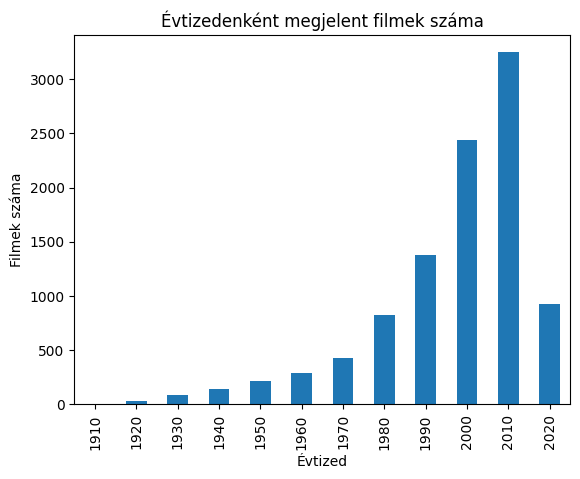

In [135]:
movies_per_decade = df.groupby((df['year_released'] // 10) * 10)

movies_per_decade.size().plot(
    kind='bar',
    title="Évtizedenként megjelent filmek száma",
    xlabel="Évtized",
    ylabel="Filmek száma"
)


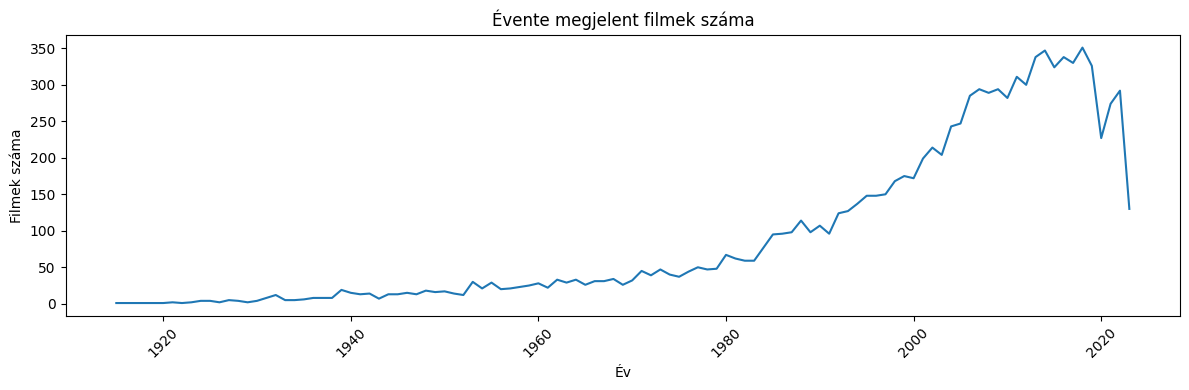

In [136]:
movies_per_year = df.groupby('year_released').size()

movies_per_year.plot(
    kind='line', figsize=(12, 4),
    title="Évente megjelent filmek száma",
    xlabel="Év", ylabel="Filmek száma"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.1.2 Filmek bevételeinek változása

In [137]:
fig = px.box(df['gross'])
fig.update_layout(
    yaxis_title='Bevétel milliárdban'
)
fig.show()

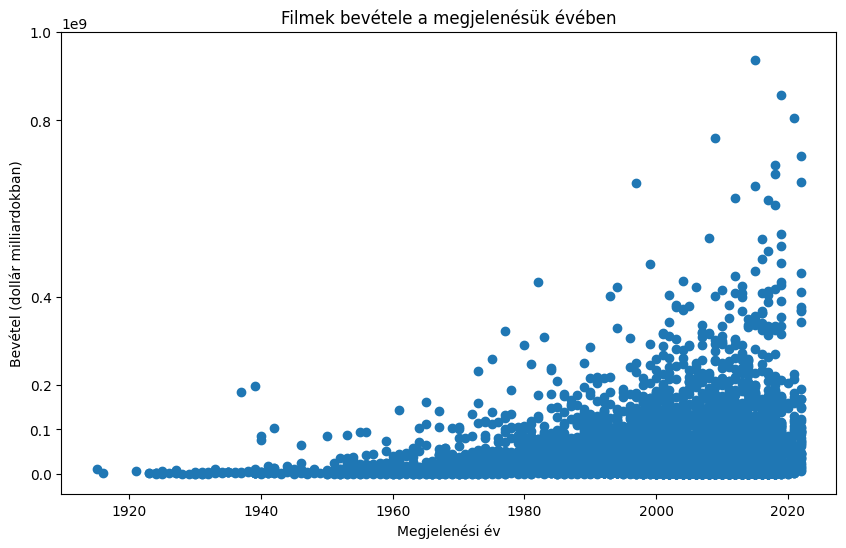

In [138]:


plt.figure(figsize=(10, 6))

plt.scatter(df["year_released"], df["gross"])
plt.xlabel("Megjelenési év")
plt.ylabel("Bevétel (dollár milliardokban)")
plt.title("Filmek bevétele a megjelenésük évében")
plt.yticks([0, 100_000_000, 200_000_000, 400_000_000, 800_000_000, 1_000_000_000])

plt.show()


A bevételekre egy lin. regressziós egyenest illesztek, amit később lehet használni a hiányzó bevételek megbecsléséhez is.

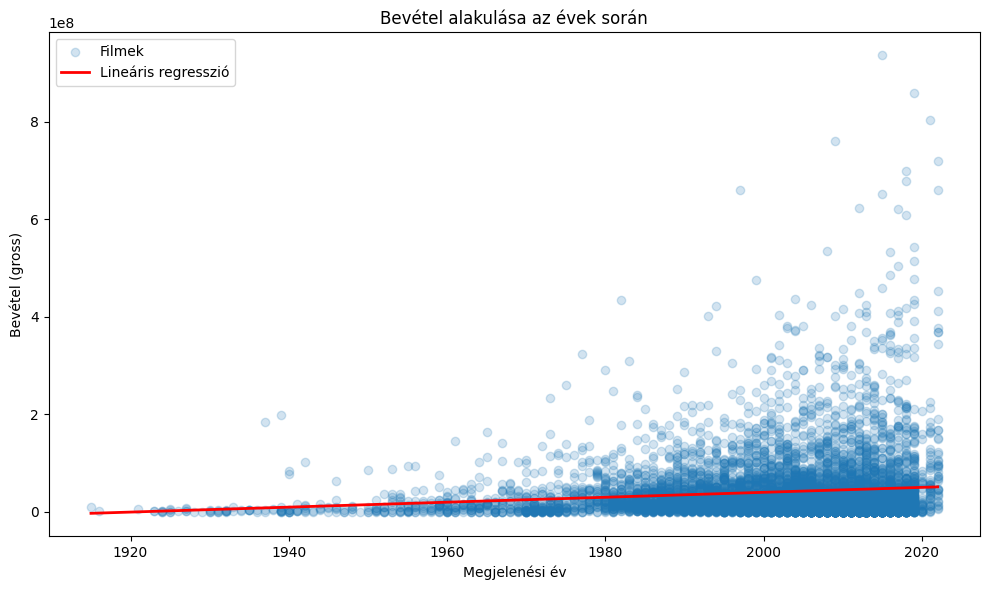

In [ ]:
x = df["year_released"]
y = df["gross"]
mask = x.notna() & y.notna()
x = x[mask].astype(float)
y = y[mask].astype(float)

a, b = np.polyfit(x, y, 1)

x_line = np.linspace(x.min(), x.max(), 100)
y_line = a * x_line + b

plt.figure(figsize=(10, 6))

plt.scatter(x, y, alpha=0.2, label="Filmek")

plt.plot(x_line, y_line, linewidth=2, label="Lineáris regresszió",color='red')

plt.xlabel("Megjelenési év")
plt.ylabel("Bevétel (gross)")
plt.title("Bevétel alakulása az évek során")
plt.legend()
plt.tight_layout()
plt.show()

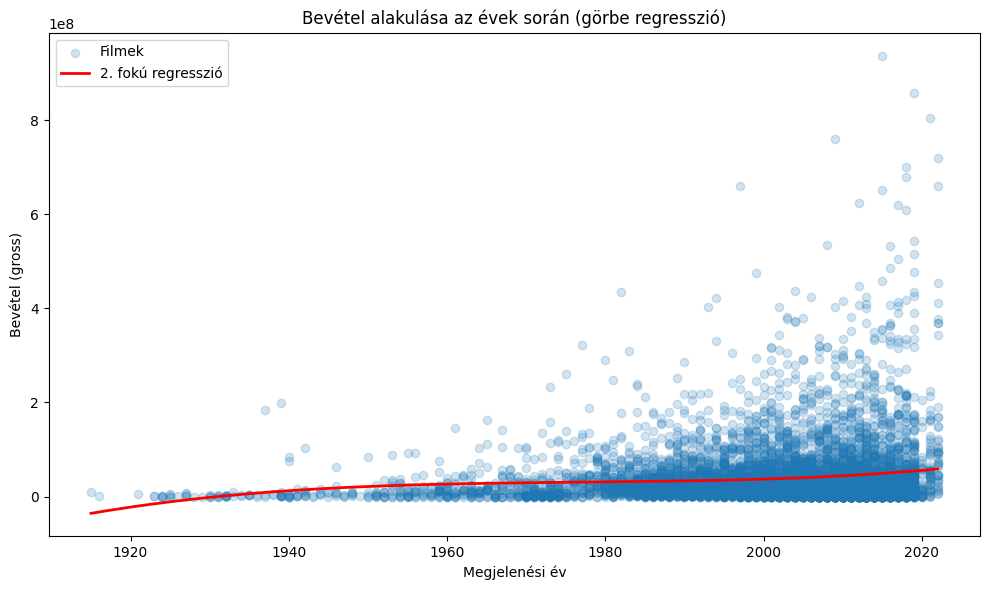

In [ ]:
x = df["year_released"]
y = df["gross"]
mask = x.notna() & y.notna()
x = x[mask].astype(float)
y = y[mask].astype(float)

# 2. fokú polinom 
coeffs = np.polyfit(x, y, 3)  
x_line = np.linspace(x.min(), x.max(), 200)
y_line = np.polyval(coeffs, x_line)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.2, label="Filmek")

plt.plot(x_line, y_line, color="red", linewidth=2, label="2. fokú regresszió")

plt.xlabel("Megjelenési év")
plt.ylabel("Bevétel (gross)")
plt.title("Bevétel alakulása az évek során (görbe regresszió)")
plt.legend()
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Éves átlagos bevétel alakulása az évek során'}, xlabel='Megjelenési év', ylabel='Átlagos bevétel (gross)'>

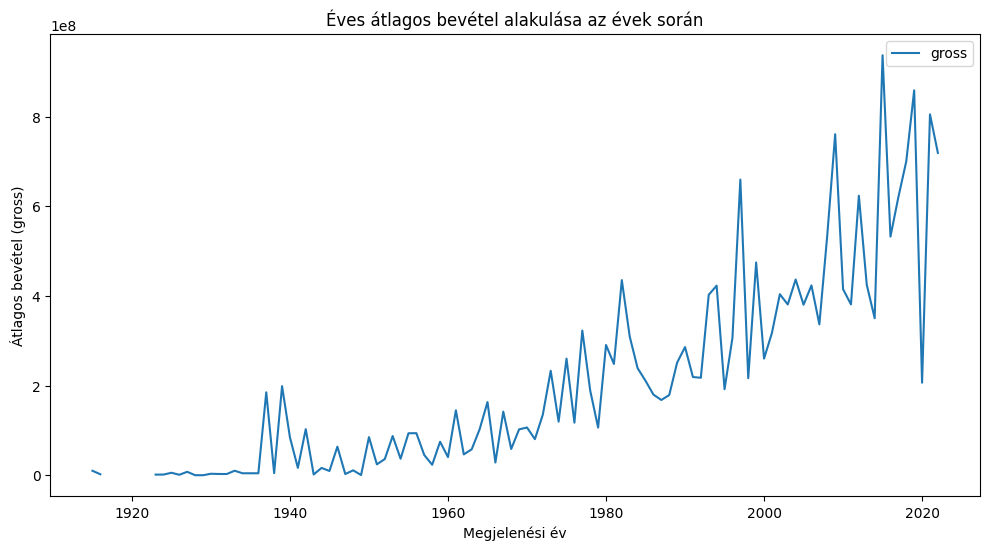

In [141]:
df.groupby("year_released")["gross"].max().reset_index().plot(
    x="year_released", y="gross", kind="line", figsize=(12, 6),
    title="Éves átlagos bevétel alakulása az évek során",
    xlabel="Megjelenési év",
    ylabel="Átlagos bevétel (gross)"
)

### 3.1.3 Értékelések

In [142]:
fig = px.box(df['movie_rating'])
fig.show()

### 3.1.4 Rendezők

In [143]:
directors = (
    df["director"]
    .str.strip("[]")
    .str.replace("'", "", regex=False)
    .str.split(", ")
    .explode()
)

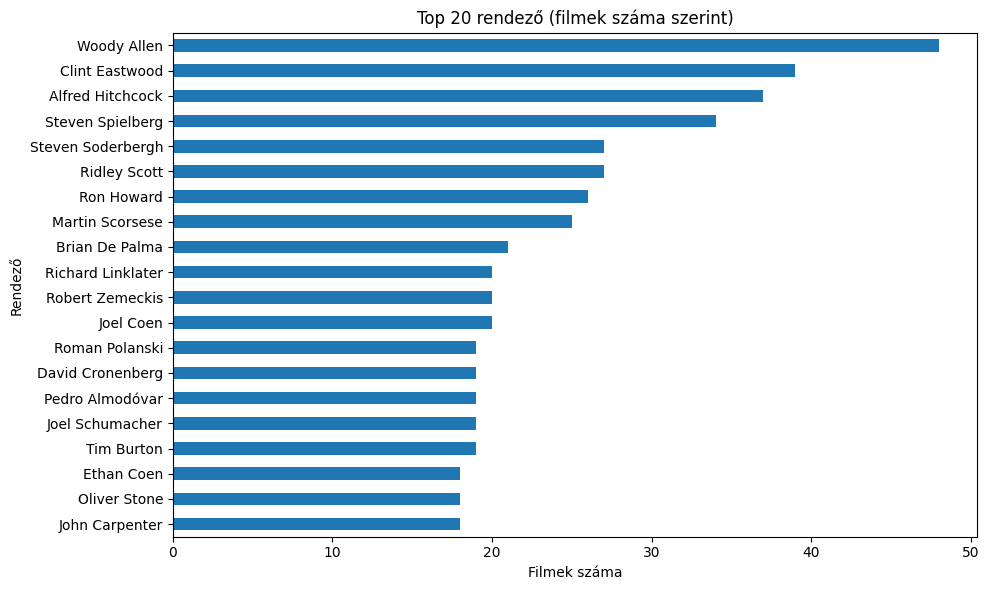

In [ ]:
director_counts = directors.value_counts()    

# Top 20 rendező filmek száma szerint
top20_directors = director_counts.head(20)

plt.figure(figsize=(10, 6))
top20_directors.sort_values().plot(kind="barh")   
plt.xlabel("Filmek száma")
plt.ylabel("Rendező")
plt.title("Top 20 rendező (filmek száma szerint)")
plt.tight_layout()
plt.show()


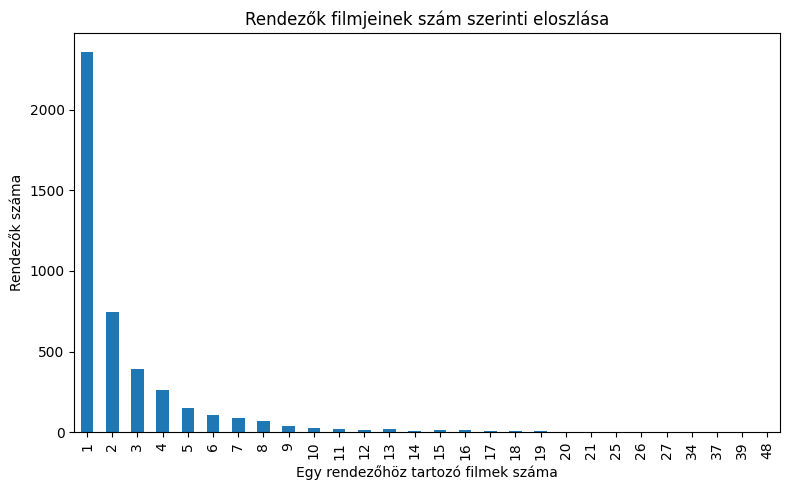

In [145]:
plt.figure(figsize=(8, 5))
director_counts.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Egy rendezőhöz tartozó filmek száma")
plt.ylabel("Rendezők száma")
plt.title("Rendezők filmjeinek szám szerinti eloszlása")
plt.tight_layout()
plt.show()


Az a top 20 rendező, akiknek legalább 5 filmjük van, és a legmagasabb értékelésekkel rendelkeznek.

<Figure size 1000x600 with 0 Axes>

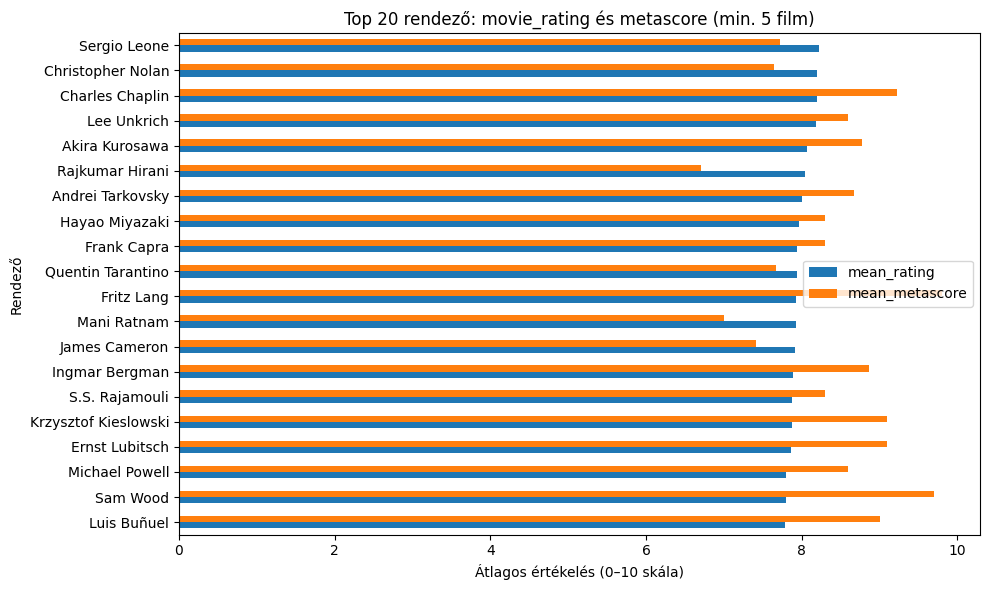

In [146]:
df_directors = df.copy()
df_directors["director_clean"] = (
    df_directors["director"]
    .str.strip("[]")
    .str.replace("'", "", regex=False)
    .str.split(", ")
)
df_directors = df_directors.explode("director_clean") 

dir_stats = (
    df_directors
    .groupby("director_clean")
    .agg(
        count=("movie_rating", "count"),
        mean_rating=("movie_rating", "mean"),
        mean_metascore=("metascore", "mean")
    )
)

dir_stats_5plus = dir_stats[
    (dir_stats["count"] >= 5) & (~dir_stats["mean_metascore"].isna())
]

top20 = dir_stats_5plus.sort_values("mean_rating", ascending=False).head(20)

top20["mean_metascore"] = top20["mean_metascore"] 

top20 = top20.sort_values("mean_rating")

plt.figure(figsize=(10, 6))
ax = top20[["mean_rating", "mean_metascore"]].plot(
    kind="barh", figsize=(10, 6)
)
ax.set_xlabel("Átlagos értékelés (0–10 skála)")
ax.set_ylabel("Rendező")
ax.set_title("Top 20 rendező: movie_rating és metascore (min. 5 film)")
plt.tight_layout()
plt.show()


### 3.1.5 Népszerűség 

Érdekes, hogy nincsen 4.7-nél kisebb felhasználói értékelésünk, de láthatjuk, hogy a felhaználói értékelések 7 környékén, míg a Metascore 6-nál csúcsosodik.

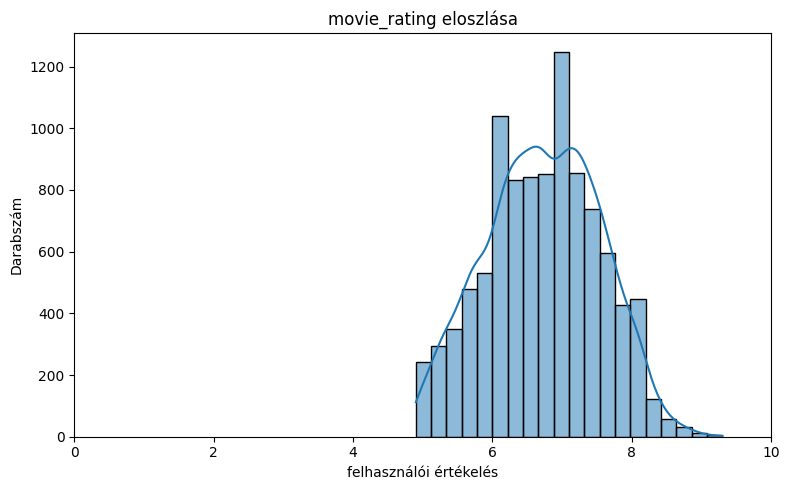

In [147]:
plt.figure(figsize=(8, 5))
sns.histplot(df["movie_rating"], bins=20, kde=True)
plt.xlabel("felhasználói értékelés")
plt.ylabel("Darabszám")
plt.title("movie_rating eloszlása")
plt.xlim(0, 10)
plt.tight_layout()
plt.show()


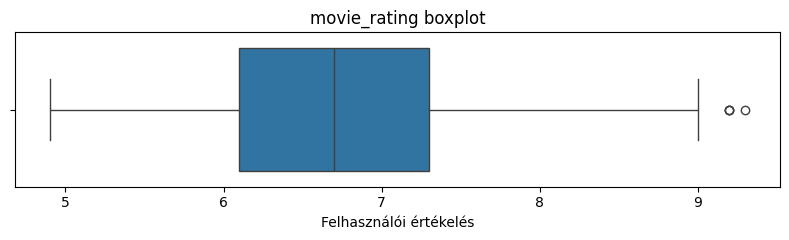

In [148]:
plt.figure(figsize=(8, 2.5))
sns.boxplot(x=df["movie_rating"])
plt.xlabel("Felhasználói értékelés")
plt.title("movie_rating boxplot")
plt.tight_layout()
plt.show()


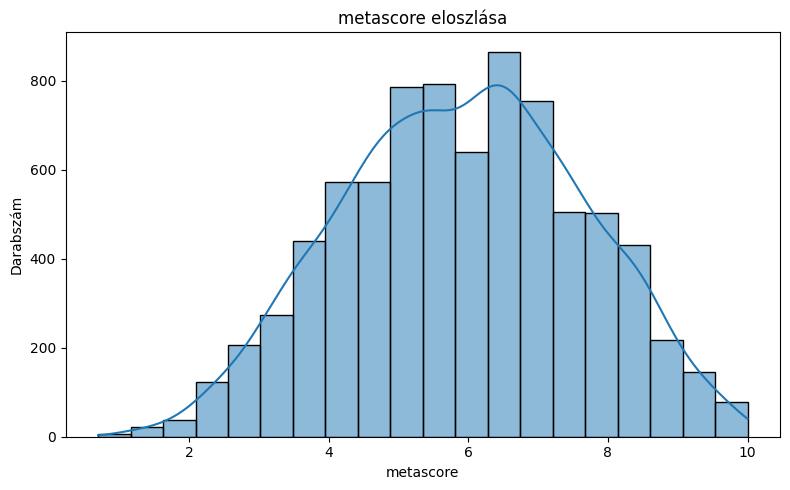

In [149]:
plt.figure(figsize=(8, 5))
sns.histplot(df["metascore"], bins=20, kde=True)
plt.xlabel("metascore")
plt.ylabel("Darabszám")
plt.title("metascore eloszlása")
plt.tight_layout()
plt.show()

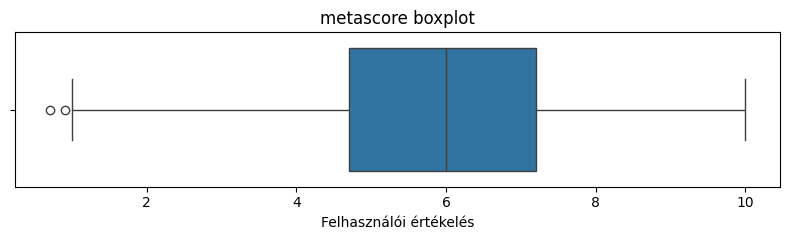

In [150]:
plt.figure(figsize=(8, 2.5))
sns.boxplot(x=df["metascore"])
plt.xlabel("Felhasználói értékelés")
plt.title("metascore boxplot")
plt.tight_layout()
plt.show()

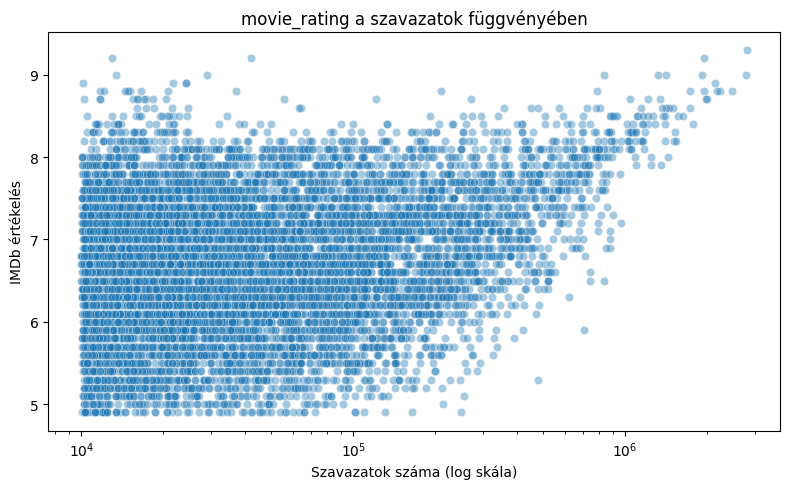

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="votes", y="movie_rating", alpha=0.4)
plt.xscale("log") 
plt.xlabel("Szavazatok száma (log skála)")
plt.ylabel("IMDb értékelés")
plt.title("movie_rating a szavazatok függvényében")
plt.tight_layout()
plt.show()

### 3.1.6 Színészek

actors
Robert De Niro       71
Nicolas Cage         63
Samuel L. Jackson    62
Bruce Willis         55
Tom Hanks            54
Morgan Freeman       52
Johnny Depp          49
Nicole Kidman        49
Liam Neeson          48
Anthony Hopkins      47
Clint Eastwood       47
Dennis Quaid         47
Akshay Kumar         47
Matt Damon           46
Julianne Moore       46
Ewan McGregor        45
Jackie Chan          45
Mark Wahlberg        45
Meryl Streep         45
Michael Caine        45
Name: count, dtype: int64


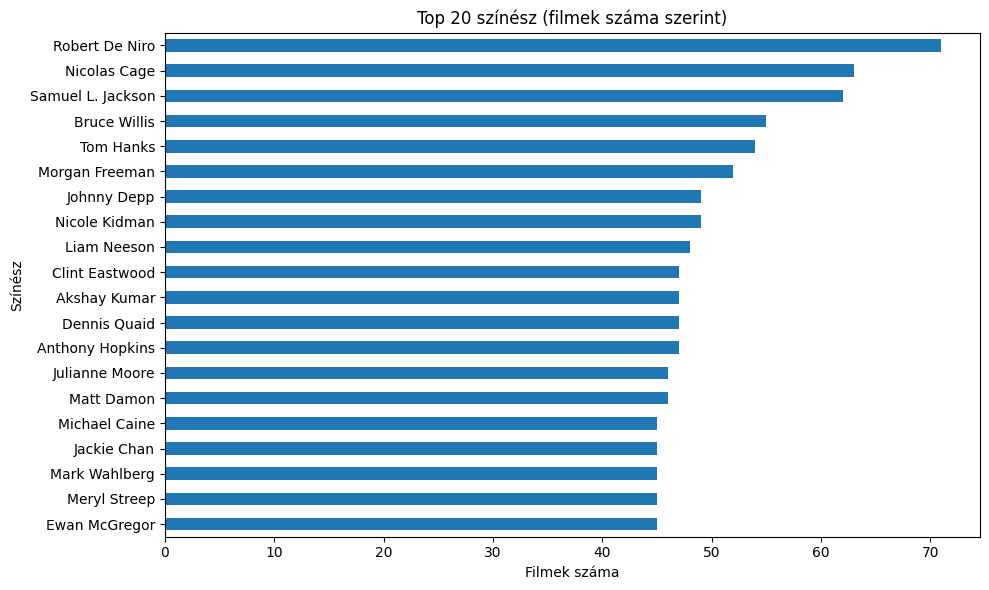

In [ ]:
actors = (
    df["actors"]                     
    .str.strip("[]")
    .str.replace("'", "", regex=False)
    .str.split(", ")
    .explode()                         
)

actor_counts = actors.value_counts()        
print(actor_counts.head(20))                 

# Top 20 színész filmek száma szerint
top20_actors = actor_counts.head(20)

plt.figure(figsize=(10, 6))
top20_actors.sort_values().plot(kind="barh")
plt.xlabel("Filmek száma")
plt.ylabel("Színész")
plt.title("Top 20 színész (filmek száma szerint)")
plt.tight_layout()
plt.show()


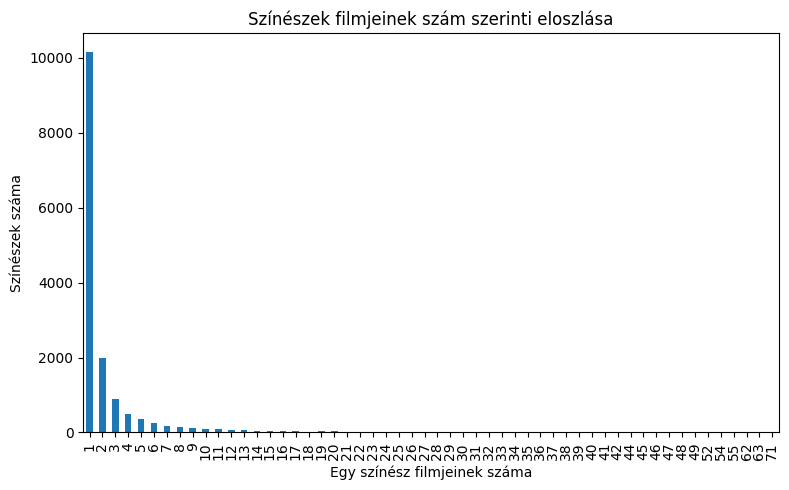

In [166]:
plt.figure(figsize=(8, 5))
actor_counts.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Egy színész filmjeinek száma")
plt.ylabel("Színészek száma")
plt.title("Színészek filmjeinek szám szerinti eloszlása")
plt.tight_layout()
plt.show()


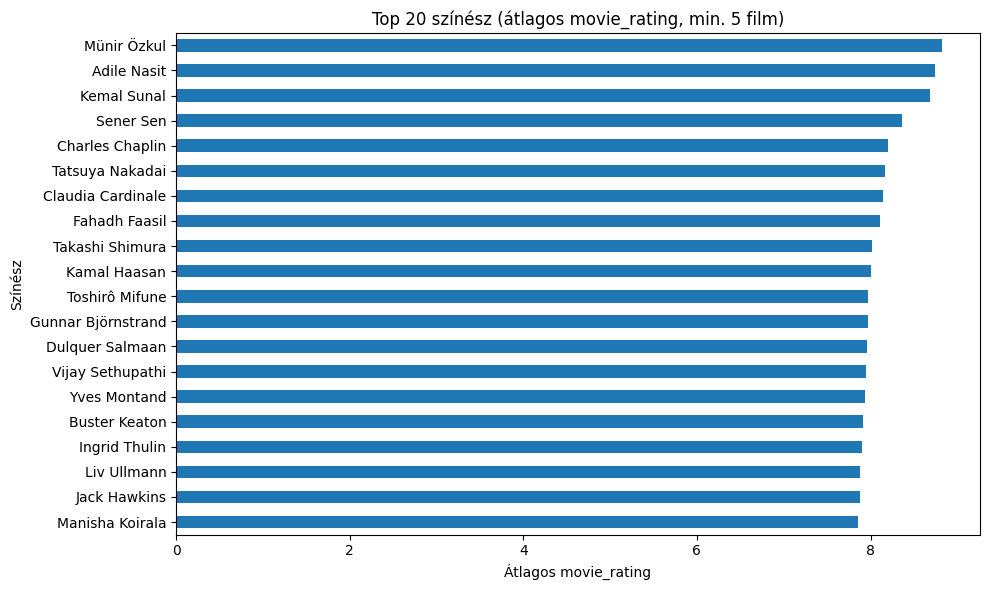

In [ ]:
tmp = pd.DataFrame({
    "actor": actors,
    "movie_rating": df.loc[actors.index, "movie_rating"]
})

actor_stats = (
    tmp
    .groupby("actor")["movie_rating"]
    .agg(count="count", mean_rating="mean")
)

actor_stats_5plus = actor_stats[actor_stats["count"] >= 5]

# 20 átlagos értékelés szerint
top20_by_rating = (
    actor_stats_5plus
    .sort_values("mean_rating", ascending=False)
    .head(20)
)

plt.figure(figsize=(10, 6))
top20_by_rating.sort_values("mean_rating")["mean_rating"].plot(kind="barh")
plt.xlabel("Átlagos movie_rating")
plt.ylabel("Színész")
plt.title("Top 20 színész (átlagos movie_rating, min. 5 film)")
plt.tight_layout()
plt.show()

## 3.2 Kategorikus változók vizsgálata

### 3.3.1 Műfajok darabszáma

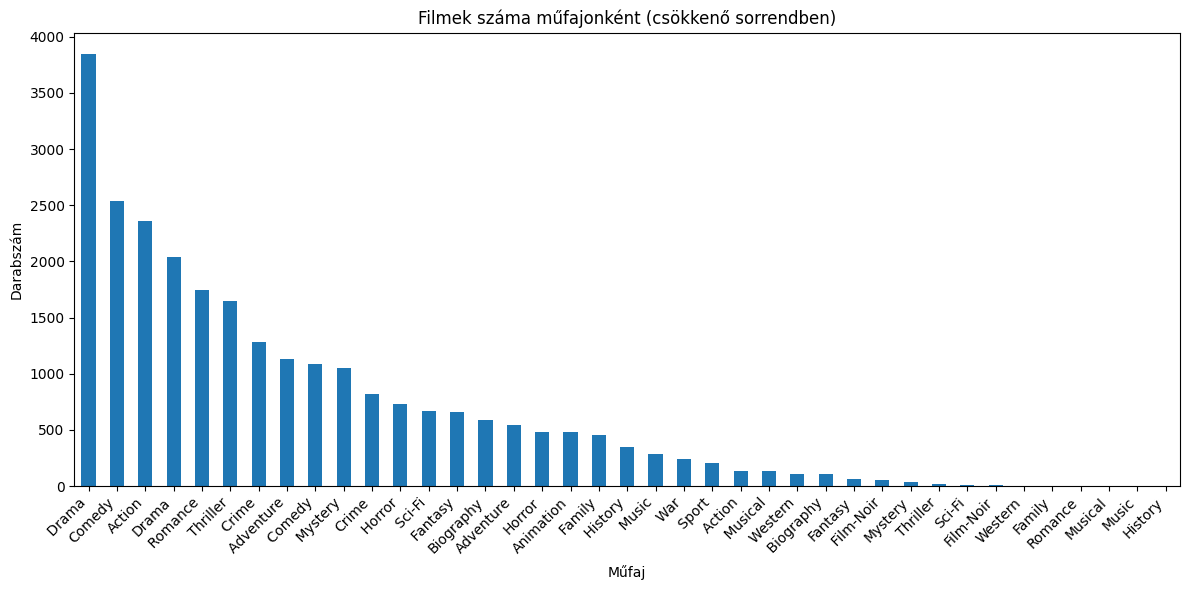

In [152]:


genre_counts = (
    df["genre"]
    .str.strip("[]")
    .str.replace("'", "", regex=False)
    .str.split(", ")
    .explode()
    .value_counts()             
)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind="bar")
plt.xlabel("Műfaj")
plt.ylabel("Darabszám")
plt.title("Filmek száma műfajonként (csökkenő sorrendben)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [153]:
# 10 leggyakoribb műfaj
top10 = genre_counts.head(10)
print(top10)

genre
 Drama        3842
Comedy        2534
Action        2357
Drama         2043
 Romance      1743
 Thriller     1644
 Crime        1283
 Adventure    1131
 Comedy       1090
 Mystery      1052
Name: count, dtype: int64


### 3.3.2 Beosorolások

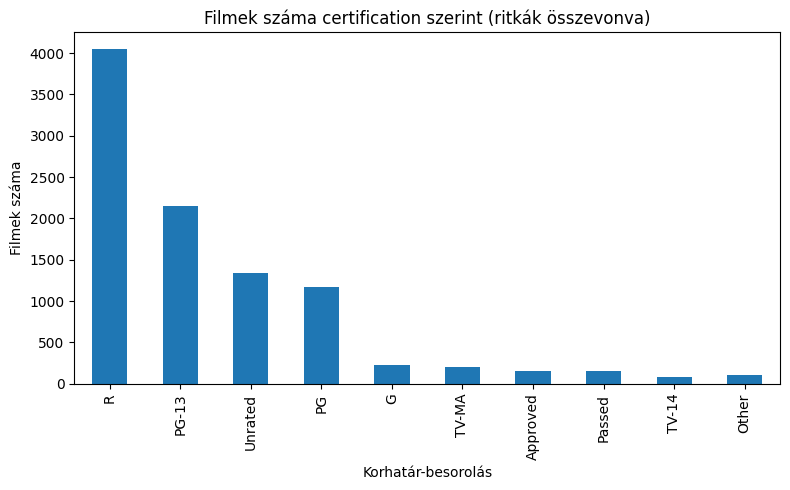

In [157]:
threshold = 50
major = cert_counts[cert_counts >= threshold]
other_sum = cert_counts[cert_counts < threshold].sum()
cert_counts_grouped = major.copy()
cert_counts_grouped["Other"] = other_sum

plt.figure(figsize=(8, 5))
cert_counts_grouped.plot(kind="bar")
plt.xlabel("Korhatár-besorolás")
plt.ylabel("Filmek száma")
plt.title("Filmek száma certification szerint (ritkák összevonva)")
plt.tight_layout()
plt.show()


# 4 Összefüggések feltárása
Korrelációk, releváns kapcsolatok, érdekes megfigyelések kiemelése

## 4.1 Általános összefüggések

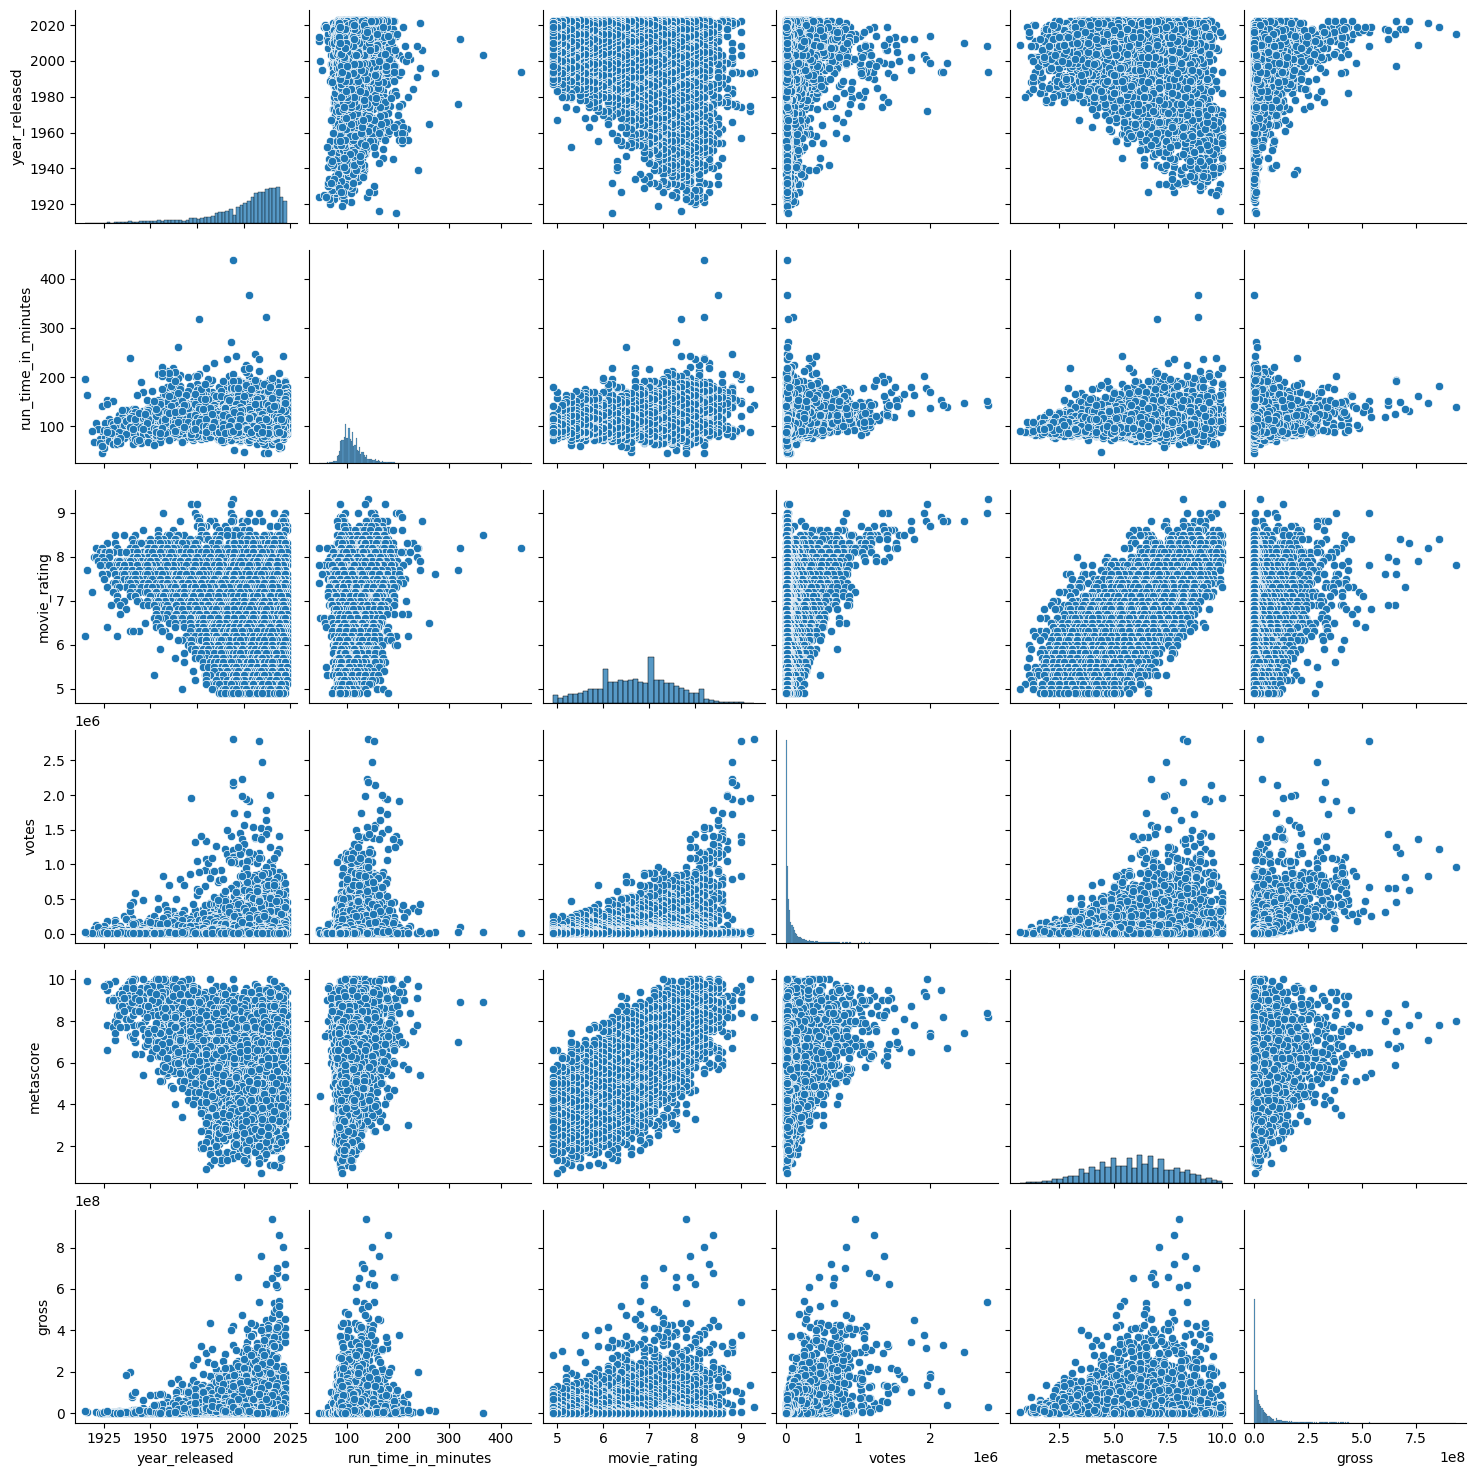

In [97]:
pp = sns.pairplot(df, vars=['year_released', 
                       'run_time_in_minutes', 
                       'movie_rating',
                       'votes', 
                       'metascore', 
                       'gross'])

In [39]:
corr = df[['year_released', 
           'run_time_in_minutes', 
           'movie_rating',
           'votes', 
           'metascore', 
           'gross']].dropna().corr()
corr

,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross
year_released,1.00,-0.05,-0.24,0.08,-0.21,0.11
run_time_in_minutes,-0.05,1.00,0.37,0.29,0.23,0.21
movie_rating,-0.24,0.37,1.00,0.42,0.72,0.12
votes,0.08,0.29,0.42,1.00,0.23,0.61
metascore,-0.21,0.23,0.72,0.23,1.00,0.04
gross,0.11,0.21,0.12,0.61,0.04,1.00


<Axes: >

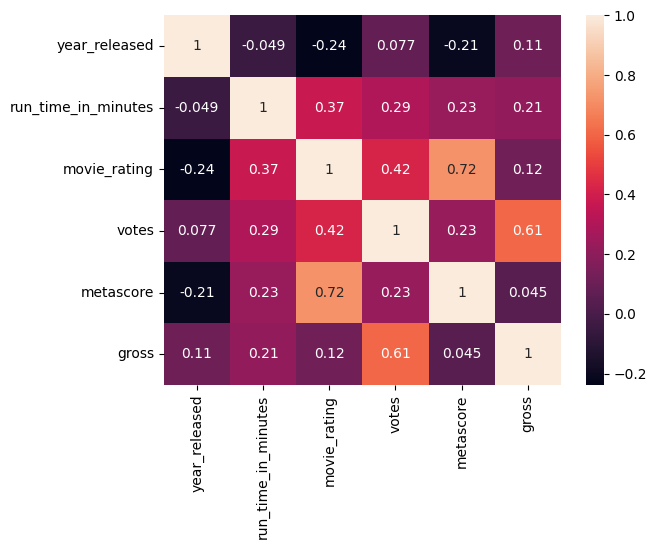

In [41]:
sns.heatmap(corr, annot=True)

## 4.2 Leadott szavazatok és a bevétel közötti összefüggés
Látható, hogy maximálás bevételek és az átlagos szavazat szám között egészen nagy korreláció figyelhető meg.
Nyílvánvaló, ha egy filmnek nagy volt a bevétele, akkor sokan nézték meg, akkor sokan is mondanak majd róla véleményt.

In [ ]:
yearly_gross = df.groupby("year_released")["gross"].max().reset_index()
yearly_gross.rename(columns={"gross": "max_gross"}, inplace=True)

yearly_votes = df.groupby("year_released")["votes"].mean().reset_index()
yearly_votes.rename(columns={"votes": "avg_votes"}, inplace=True)

merged = yearly_gross.merge(yearly_votes, on="year_released", how="inner")

corr = merged["max_gross"].corr(merged["avg_votes"])
corr


np.float64(0.660269094735791)

## 4.3

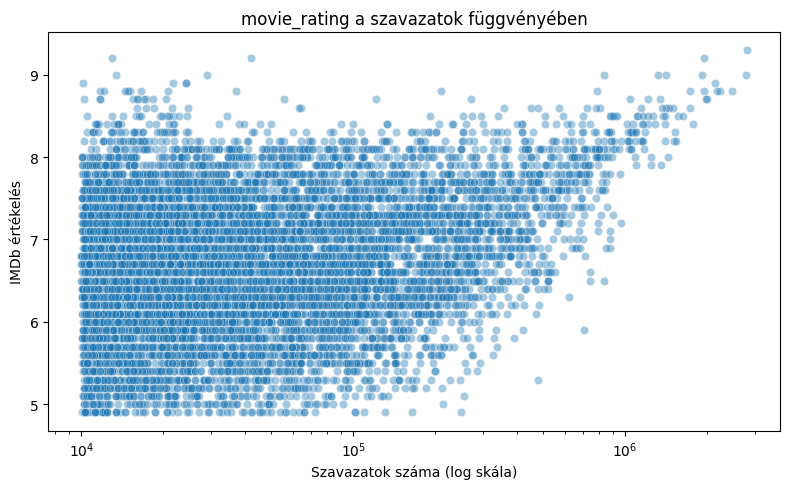

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="votes", y="movie_rating", alpha=0.4)
plt.xscale("log")  
plt.xlabel("Szavazatok száma (log skála)")
plt.ylabel("IMDb értékelés")
plt.title("movie_rating a szavazatok függvényében")
plt.tight_layout()
plt.show()


# 5 Kezdeti hipotézisek megfogalmazása